In [ ]:
%%shell
pip install \
gymnasium  \
pygame \
numpy \
huggingface_hub \
pickle5 \
pyyaml==6.0 \
imageio \
imageio_ffmpeg \
pyglet==1.5.1 \
tqdm \
moviepy

sudo apt-get update
sudo apt-get install -y python3-opengl
apt install ffmpeg xvfb

In [ ]:
import numpy as np
import gymnasium as gym
import random
import imageio
import os
import tqdm
import moviepy.editor
import numpy
import seaborn as sns

import pickle5 as pickle
from tqdm.notebook import tqdm

In [ ]:
# example of random run
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode="rgb_array")
env.reset()
writer = imageio.get_writer("file.mp4", fps=30)

terminated = False
for step in range(200):
    frame = env.render()
    writer.append_data(frame)
    if terminated:
      break
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    print(observation,terminated)

writer.close()
env.close()
moviepy.editor.ipython_display("file.mp4")

4 False
0 False
0 False
0 False
0 False
4 False
8 False
8 False
9 False
10 False
14 False
10 False
14 False
14 False
10 False
11 True


In [ ]:
def initialize_q_table(state_space, action_space):
  q_table = numpy.zeros((state_space,action_space))
  return q_table

def greedy_policy(q_table, state):
  action = np.argmax(q_table[state][:]) # returns index of largest number as if the array is flattened
  return action

def epsilon_greedy_policy(q_table,state,epsilon):
  random_num = np.random.rand()
  if random_num > epsilon: # exploitation
    action = greedy_policy(q_table,state)
  else: # exploration
    action = np.random.randint(0,q_table.shape[1])
  return action

In [ ]:
def train(
  env,
  gamma = 0.95,
  max_steps = 99,
  max_epsilon = 1.0,  # epsilon at start
  min_epsilon = 0.05,  # min epsilon probability
  decay_rate = 0.0005,  # exponential decay rate for exploration prob
  learning_rate = 0.7,
  n_training_episodes = 10000,
):
  q_table = initialize_q_table(env.observation_space.n, env.action_space.n)

  for episode in range(n_training_episodes):
    # decrement epsilon using decay_rate
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    state, info = env.reset()
    for step in range(max_steps):
      action = epsilon_greedy_policy(q_table,state,epsilon)
      new_state, reward, terminated, truncated, info = env.step(action)
      q_table[state][action] = q_table[state][action] + learning_rate * (reward + gamma * np.max(q_table[new_state]) - q_table[state][action])
      if terminated or truncated:
        break
      state = new_state

  return q_table

<Axes: >

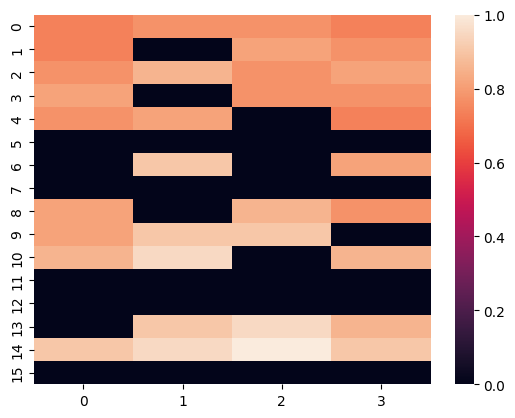

In [ ]:
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode="rgb_array")
q_table = train(env,n_training_episodes=10000)
sns.heatmap(q_table)

In [ ]:
terminated = False
state, info = env.reset()
writer = imageio.get_writer("file.mp4", fps=10)
for step in range(200):
    frame = env.render()
    writer.append_data(frame)
    if terminated:
      break
    action = greedy_policy(q_table,state)
    state, reward, terminated, truncated, info = env.step(action)

writer.close()
env.close()
moviepy.editor.ipython_display("file.mp4")